In [3]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

#Load the dataset
file_path = 'news-article-categories clean.csv'
data = pd.read_csv(file_path)

# Combine 'title and 'body' into a single column for text analysis
data['text'] = data['title'] + " " + data['body']

#Remove rows with missing values in 'category', 'title', or 'body'
data = data.dropna(subset=['category','title', 'body'])


C:\Users\zobayer\AppData\Local\Temp\ipykernel_29500\992906757.py:9: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,2

C:\Users\zobayer\AppData\Local\Temp\ipykernel_29500\3688296292.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


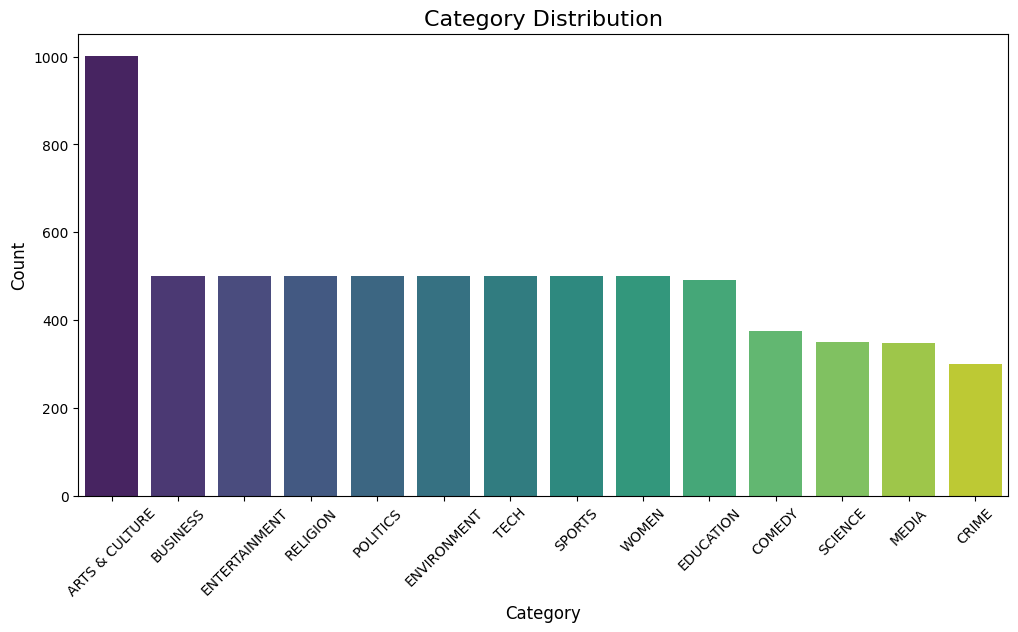

In [4]:
# Plot the distribution of categories
plt.figure(figsize=(12, 6))
category_counts = data['category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("Category Distribution", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()


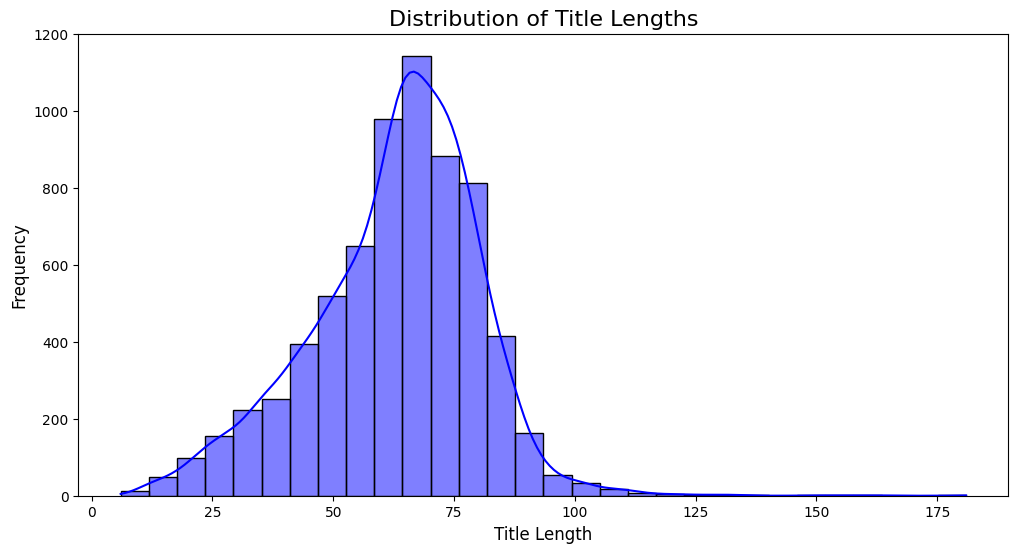

In [5]:
# Analyze the length of the 'title'
data['title_length'] = data['title'].str.len()

# Plot the distribution of title lengths
plt.figure(figsize=(12, 6))
sns.histplot(data['title_length'], kde=True, bins=30, color='blue')
plt.title("Distribution of Title Lengths", fontsize=16)
plt.xlabel("Title Length", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


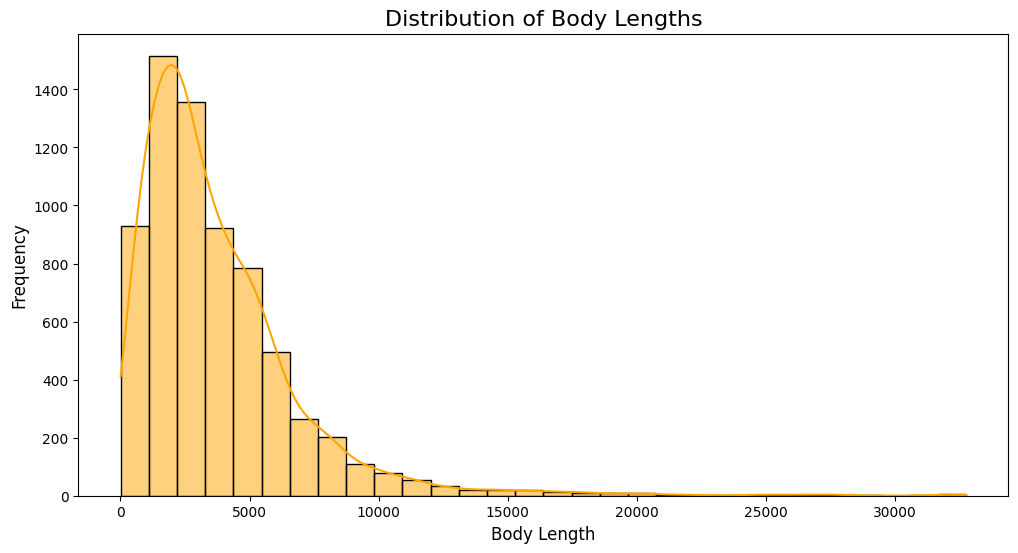

In [5]:
# Analyze the length of the 'body'
data['body_length'] = data['body'].str.len()

# Plot the distribution of body lengths
plt.figure(figsize=(12, 6))
sns.histplot(data['body_length'], kde=True, bins=30, color='orange')
plt.title("Distribution of Body Lengths", fontsize=16)
plt.xlabel("Body Length", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


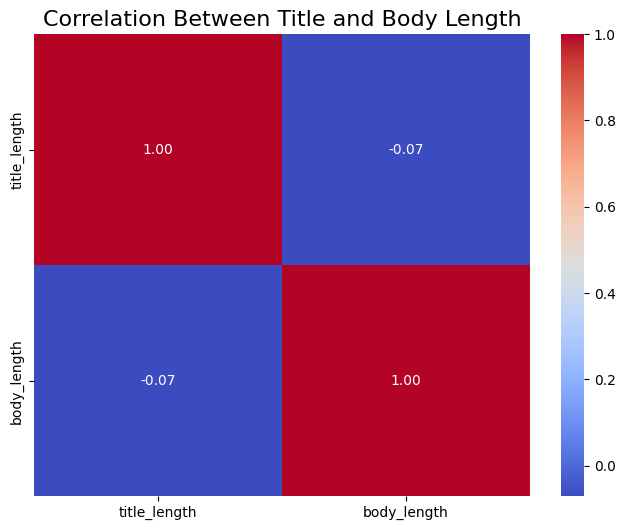

In [6]:
# Correlation between title length and body length
correlation = data[['title_length', 'body_length']].corr()

# Heatmap of the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Title and Body Length", fontsize=16)
plt.show()


C:\Users\zobayer\AppData\Local\Temp\ipykernel_13020\1516459460.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


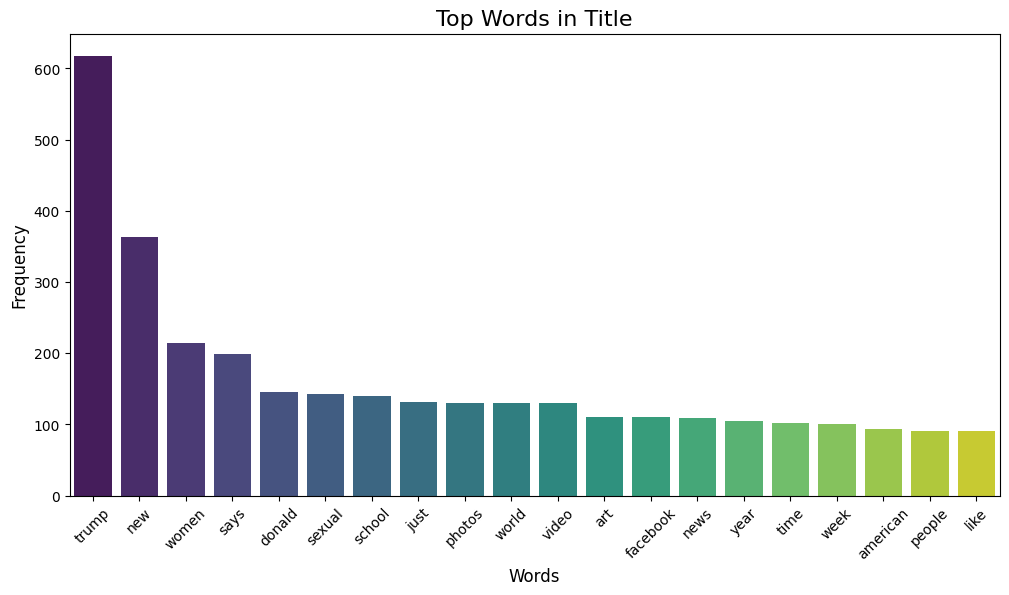

In [7]:
# Function to extract top N words
def get_top_words(column, top_n=20):
    vectorizer =CountVectorizer(stop_words='english')
    word_counts = vectorizer.fit_transform(data[column].fillna(""))
    sum_words =word_counts.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]
    return words_freq

# Get top words in the title
top_words_title =get_top_words('title')

# Plot top words in the title
words, counts = zip(*top_words_title)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.title("Top Words in Title", fontsize=16)
plt.xlabel("Words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)
plt.show()


C:\Users\zobayer\AppData\Local\Temp\ipykernel_13020\1817952334.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="magma")


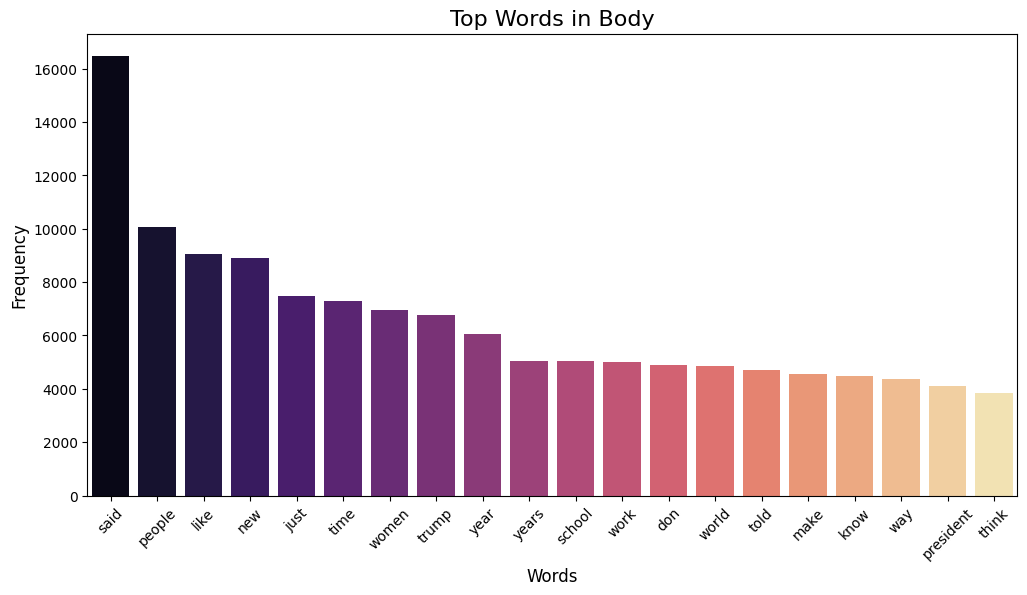

In [8]:
# Get top words in the body
top_words_body = get_top_words('body')

# Ploting top words in the body
words, counts = zip(*top_words_body)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words),y=list(counts), palette="magma")
plt.title("Top Words in Body", fontsize=16)
plt.xlabel("Words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)
plt.show()


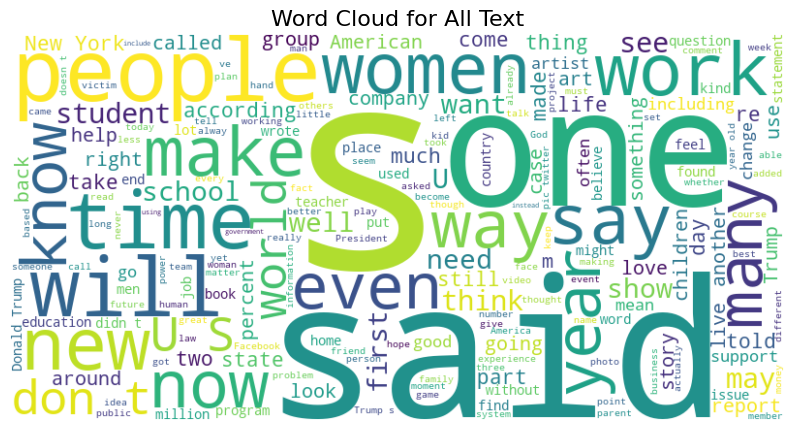

In [9]:
from wordcloud import WordCloud

# Generate a word cloud for all text data
text_data = " ".join(data['text'].dropna())
wordcloud = WordCloud(width=800,height=400, background_color='white').generate(text_data)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for All Text", fontsize=16)
plt.show()


C:\Users\zobayer\AppData\Local\Temp\ipykernel_13020\1359936022.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="magma", hue=None)


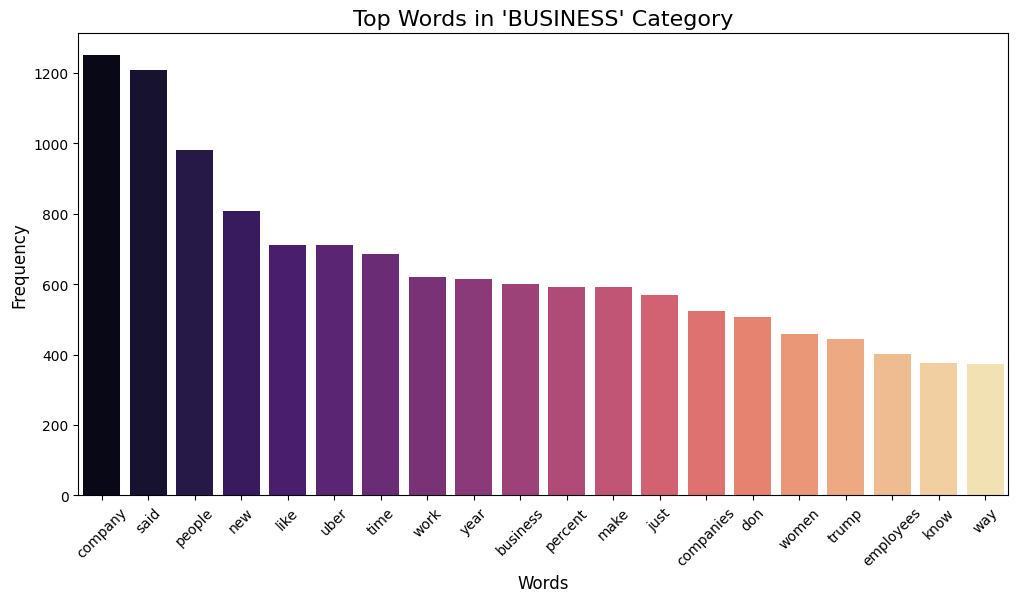

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "news-article-categories clean.csv"
data = pd.read_csv(file_path, low_memory=False)

# Drop rows with missing or empty text in 'body' column
data.dropna(subset=['body'],inplace=True)
data['body'] = data['body'].str.strip()
data = data[data['body'] != ""]

# Function of extract top words
def get_top_words(text_series, top_n=20):
    vectorizer = CountVectorizer(stop_words='english')
    if text_series.empty:
        raise ValueError("No valid text found for the given category.")
    word_counts = vectorizer.fit_transform(text_series.fillna(""))
    sum_words = word_counts.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]
    return words_freq

# Specify the category
specific_category = 'BUSINESS'  
if specific_category not in data['category'].unique():
    raise ValueError(f"Category '{specific_category}' not found in dataset.")

# Filter the dataset for the specified category
filtered_texts = data[data['category'] == specific_category]['body']

# Get the top words in the selected category
top_words = get_top_words(filtered_texts, top_n=20)

# Plot the top words
words, counts = zip(*top_words)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words),y=list(counts), palette="magma", hue=None)
plt.title(f"Top Words in '{specific_category}' Category", fontsize=16)
plt.xlabel("Words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)
plt.show()



In [17]:
print(data['category'].unique()) #printing all the category


['ARTS & CULTURE' 'BUSINESS' 'COMEDY' 'CRIME' 'EDUCATION' 'ENTERTAINMENT'
 'ENVIRONMENT' 'MEDIA' 'POLITICS' 'RELIGION' 'SCIENCE' 'SPORTS' 'TECH'
 'WOMEN']
